In [70]:
import pandas as pd
import numpy as np

from tensorflow.keras import Sequential, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

#remove warnings
import warnings
warnings.filterwarnings('ignore')

# New section

In [86]:
file_path = '/Users/ppellegrini/code/PasPelle/ML_vs_Cancer/raw_data/train_labels.csv'
labels_df = pd.read_csv(file_path)

train_path = '/Users/ppellegrini/code/PasPelle/ML_vs_Cancer/raw_data/train/'

# labels_df = labels_df.sample(100)


In [157]:
# (labels_df['label'] == 0).sum()

In [158]:
# (labels_df['label'] == 1).sum()

In [98]:
# from tqdm.auto import tqdm #nice progressbar for pandas (replaces apply with progress_apply)
# tqdm.pandas() #it needs to be initialized

# import os
# import cv2
# import imageio
# import matplotlib.pyplot as plt
    
# def readImage(path):
#     # OpenCV reads the image in bgr format by default
#     bgr_img = imageio.imread(path)

#     # We flip it to rgb for visualization purposes

#     if bgr_img is not None:
#         b, g, r = np.split(bgr_img, axis=-1)
#         rgb_img = np.concatenate([r, g, b], axis=-1)
#         return rgb_img
#     else:
#         return None

# def read_tumor_image_from_path(id_):
#     path = os.path.join(train_path, id_)
#     return readImage(path + '.tif')

# def read_no_tumor_image_from_path(id_):
#     path = os.path.join(train_path, id_)
#     return readImage(path + '.tif')

In [ ]:
# import cv2
# import os
# import numpy as np
# from skimage import io

# def read_and_preprocess_image(file_path):
#     # Read the TIFF image using skimage's io.imread
#     img = io.imread(file_path)
    
#     # Check if the image was successfully loaded
#     if img is not None:
#         # Convert to RGB if the image is not already in RGB format
#         if img.shape[-1] == 1:
#             img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
#         elif img.shape[-1] == 4:
#             img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
        
#         # Resize the image to the desired input size (e.g., 224x224 for many CNNs)
#         img = cv2.resize(img, (32, 32))
        
#         # Normalize pixel values to be between 0 and 1
#         img = img / 255.0
        
#         # Expand dimensions to create a batch of size 1 (required for CNN input)
#         img = np.expand_dims(img, axis=0)
        
#         return img
#     else:
#         # Return None if the image couldn't be loaded
#         return None

# # Example usage
# image_path = "path/to/your/image.tiff"
# image_array = read_and_preprocess_image(image_path)

# if image_array is not None:
#     print("Image successfully loaded and preprocessed.")
# else:
#     print("Failed to load the image.")

In [131]:
# labels_df['img'] = labels_df.loc[labels_df['label'] == 1, 'id'].progress_apply(read_tumor_image_from_path)
# labels_df['img'] = labels_df.loc[labels_df['label'] == 0, 'id'].progress_apply(read_no_tumor_image_from_path)

# labels_df

In [132]:
# # Get tumor images' IDs
# tumor_ids = labels_df.loc[labels_df['label'] == 1, 'id']

# # Populate 'img' column with corresponding arrays
# labels_df['img'] = tumor_ids.progress_apply(read_tumor_image_from_path)


In [133]:
# # Count the number of None values in the 'img' column
# num_none_images = labels_df['img'].isnull().sum()

# print(f"Number of images with None values: {num_none_images}")

In [135]:
# #count non null values
# non_null_count = labels_df['img'].count()
# print(f"Number of images with non null values: {non_null_count}")

In [136]:
# test_image_path = os.path.join(train_path, labels_df['id'].iloc[0] + '.tif')
# test_image = cv2.imread(test_image_path)

# if test_image is not None:
#     print("Image read successfully.")
# else:
#     print("Failed to read the image.")

In [139]:
# if os.path.exists(test_image_path):
#     print("Image file exists.")
# else:
#     print("Image file does not exist.")

In [140]:
# # Check the data type of the 'id' column
# print("Data type of 'id' column:", labels_df['id'].dtype)

# # Display unique values in the 'id' column
# print("Unique values in 'id' column:", labels_df['id'].unique())

In [100]:
import os
import random
from sklearn.utils import shuffle

image_folder_label0 = '/Users/ppellegrini/code/PasPelle/ML_vs_Cancer/raw_data/train_subset/a_no_tumor_tissue/'
image_folder_label1 = '/Users/ppellegrini/code/PasPelle/ML_vs_Cancer/raw_data/train_subset/b_has_tumor_tissue/'

images_label0 = [f for f in os.listdir(image_folder_label0) if f.endswith('.tif')]
images_label1 = [f for f in os.listdir(image_folder_label1) if f.endswith('.tif')]

images = images_label0 + images_label1
labels = [0] * len(images_label0) + [1] * len(images_label1)

images, labels = shuffle(images, labels, random_state=42)

In [101]:
from PIL import Image
import numpy as np
import cv2

def read_and_process_image(file_path):
    img = Image.open(file_path)
    img = img.resize((32, 32))
    return img

images = [os.path.join(image_folder_label0, img) if label == 0 else os.path.join(image_folder_label1, img) for img, label in zip(images, labels)]

# image_arrays = [read_and_process_image(img) for img in images]
image_arrays = [cv2.imread(img_path) for img_path in images]

valid_data = [(img, label, img_array) for img, label, img_array in zip(images, labels, image_arrays) if img_array is not None]
df = pd.DataFrame(valid_data, columns=['image_path', 'label', 'image_array'])
     

In [159]:
df.shape

(18000, 3)

In [106]:
X = np.stack(df['image_array'].values)
y = df['label'].values

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)



In [108]:
X_train.shape


(5400, 96, 96, 3)

In [118]:
# #CNN

# def initialize_model():

#     model = Sequential()

#     model.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same', input_shape=(96, 96, 3)))
#     model.add(MaxPooling2D((2, 2)))

#     model.add(Dropout(0.2))

#     model.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
#     model.add(MaxPooling2D((2, 2)))

#     model.add(Dropout(0.2))

#     model.add(Conv2D(64, (2, 2), activation = 'relu', padding = 'same'))
#     model.add(Dropout(0.3))
#     model.add(MaxPooling2D((2, 2)))

#     model.add(Flatten())
#     model.add(Dense(100, activation = 'relu'))
#     model.add(Dropout(0.4))
#     model.add(Dense(1, activation = 'sigmoid'))

#     return model

In [150]:
kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.3

def initialize_model():
    model = Sequential()
    model.add(Conv2D(first_filters, kernel_size, activation = 'relu', input_shape = (96, 96, 3)))
    model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
    model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
    model.add(MaxPooling2D(pool_size = pool_size)) 
    model.add(Dropout(dropout_conv))

    model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
    model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
    model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
    model.add(MaxPooling2D(pool_size = pool_size))
    model.add(Dropout(dropout_conv))

    model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
    model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
    model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
    model.add(MaxPooling2D(pool_size = pool_size))
    model.add(Dropout(dropout_conv))

    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(dropout_dense))
    model.add(Dense(1, activation = "sigmoid"))

    model.summary()
    
    return model

In [151]:
model = initialize_model()
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 conv2d_67 (Conv2D)          (None, 92, 92, 32)        9248      
                                                                 
 conv2d_68 (Conv2D)          (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_56 (Dropout)        (None, 45, 45, 32)        0         
                                                                 
 conv2d_69 (Conv2D)          (None, 43, 43, 64)        18496     
                                                     

In [152]:
from tensorflow.keras import optimizers

def compile_model(model):
    model.compile(loss = 'binary_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    return model

In [153]:
from tensorflow.keras.callbacks import EarlyStopping

model_small = initialize_model()
model_small = compile_model(model_small)

es = EarlyStopping(patience = 5, verbose = 2)

history_small = model_small.fit(X_train, y_train,
                    validation_split = 0.3,
                    callbacks = [es],
                    epochs = 10,
                    batch_size = 64)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 94, 94, 32)        896       
                                                                 
 conv2d_76 (Conv2D)          (None, 92, 92, 32)        9248      
                                                                 
 conv2d_77 (Conv2D)          (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_60 (Dropout)        (None, 45, 45, 32)        0         
                                                                 
 conv2d_78 (Conv2D)          (None, 43, 43, 64)        18496     
                                                     

In [154]:
# Evaluate the model on the test data
test_loss, test_accuracy = model_small.evaluate(X_test, y_test)

# Print the test results
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

394/394 [==============================] - 76s 192ms/step - loss: 0.4870 - accuracy: 0.7744
Test Loss: 0.48695632815361023
Test Accuracy: 0.7744444608688354


In [155]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label = 'train' + exp_name)
    ax1.plot(history.history['val_loss'], label = 'val' + exp_name)
    ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

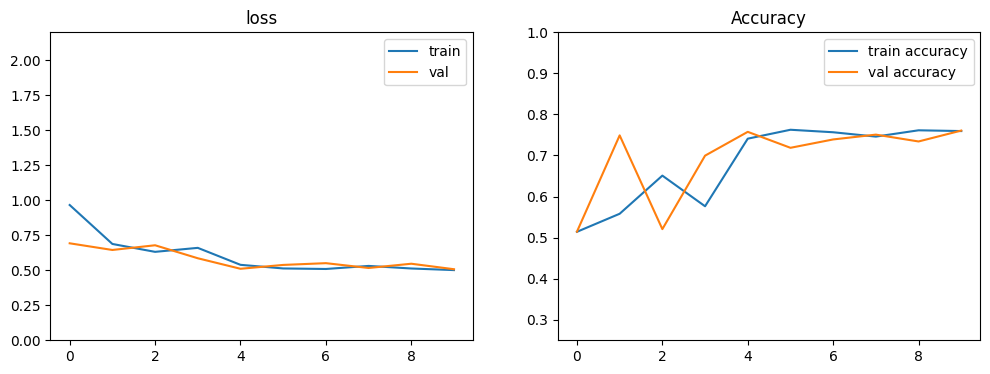

In [156]:
plot_history(history_small)
plt.show()

In [162]:
import streamlit as st

uploaded_file = st.file_uploader("Choose an image...", type=["tif", "tiff"])

if uploaded_file is not None:
    # Read and convert the uploaded .tiff image to array using cv2.imread
    image_array = cv2.imread(uploaded_file, cv2.IMREAD_UNCHANGED)

    if image_array is not None:
        st.image(image_array, caption='Uploaded Image', use_column_width=True)

2023-11-29 16:01:43.213 
  command:

    streamlit run /Users/ppellegrini/.pyenv/versions/3.10.6/envs/ML_vs_Cancer/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
